# Compte rendu de la séance 4 de la Sae 2.02

Présenté par : Edouard Nicolas et Famchon Pierre
<br>
Rendez vous tous les mardis fériés pour nous retrouver

L’objectif de la séance est de tester le filtrage de signaux sous Python.
Pour cette séance vous déposerez sur le moodle un notebook Jupyter sur lequel vous répondrez aux points suivants
(en illustrant vos réponses avec des simulations Python) :

<h3><p style="color: green">Exercice 1 : Différence(s) entre un filtre analogique et un filtre numérique et comment les paramétrer ?</p></h3>

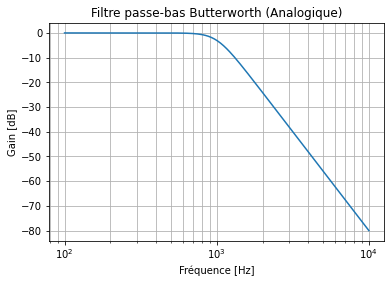

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Paramètres du filtre analogique
order = 4                # Ordre du filtre
cutoff_frequency = 1000  # Fréquence de coupure en Hz

# Calcul des coefficients du filtre
b, a = signal.butter(order, cutoff_frequency, 'low', analog=True)

# Réponse en fréquence du filtre
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Filtre passe-bas Butterworth (Analogique)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(which='both', axis='both')
plt.show()


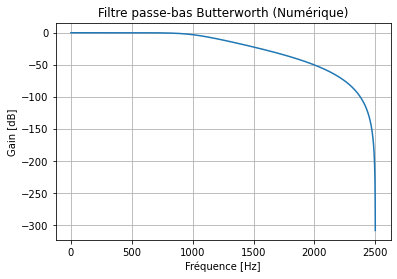

In [ ]:
# Paramètres du filtre numérique
sampling_frequency = 5000  # Fréquence d'échantillonnage en Hz
normalized_cutoff_frequency = 1000 / (0.5 * sampling_frequency)  # Fréquence de coupure normalisée

# Calcul des coefficients du filtre
b, a = signal.butter(order, normalized_cutoff_frequency, 'low', analog=False)

# Réponse en fréquence du filtre
w, h = signal.freqz(b, a, worN=8000)
plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))
plt.title('Filtre passe-bas Butterworth (Numérique)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(which='both', axis='both')
plt.show()


<h3><p style="color: green">Exercice 2 : Effet d’un filtre passe-bas (analogique et numérique) sur un signal bruité généré en Python (affichage
temporel et fréquentiel) ?</p></h3>

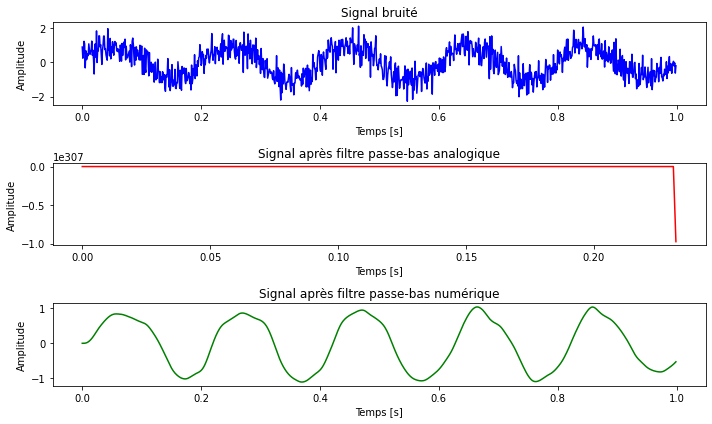

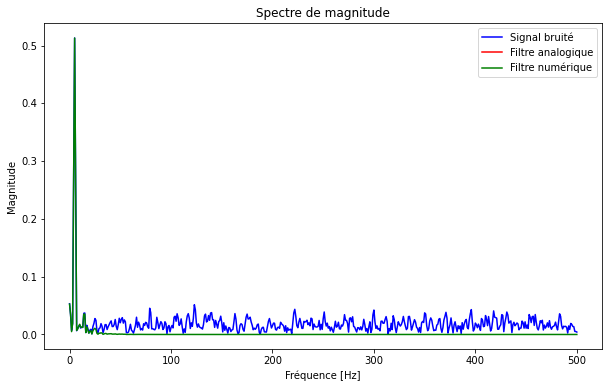

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Génération du signal bruité
np.random.seed(0)  # Pour la reproductibilité
t = np.linspace(0, 1, 1000, endpoint=False)  # Temps
signal_brute = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(1000)  # Signal sinusoïdal bruité

# Création d'un filtre passe-bas analogique
analog_order = 4
analog_cutoff_frequency = 20  # Fréquence de coupure en Hz
b_analog, a_analog = signal.butter(analog_order, analog_cutoff_frequency, 'low', analog=True)

# Application du filtre passe-bas analogique
signal_filtre_analog = signal.lfilter(b_analog, a_analog, signal_brute)

# Création d'un filtre passe-bas numérique
sampling_frequency = 1000  # Fréquence d'échantillonnage en Hz
normalized_cutoff_frequency = analog_cutoff_frequency / (0.5 * sampling_frequency)  # Fréquence de coupure normalisée
b_digital, a_digital = signal.butter(analog_order, normalized_cutoff_frequency, 'low', analog=False)

# Application du filtre passe-bas numérique
signal_filtre_numerique = signal.lfilter(b_digital, a_digital, signal_brute)

# Affichage temporel du signal bruité et des signaux filtrés
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal_brute, 'b', label='Signal bruité')
plt.title('Signal bruité')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, signal_filtre_analog, 'r', label='Filtre analogique')
plt.title('Signal après filtre passe-bas analogique')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, signal_filtre_numerique, 'g', label='Filtre numérique')
plt.title('Signal après filtre passe-bas numérique')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Affichage fréquentiel du signal bruité et des signaux filtrés
plt.figure(figsize=(10, 6))
plt.magnitude_spectrum(signal_brute, Fs=sampling_frequency, color='b', label='Signal bruité')
plt.magnitude_spectrum(signal_filtre_analog, Fs=sampling_frequency, color='r', label='Filtre analogique')
plt.magnitude_spectrum(signal_filtre_numerique, Fs=sampling_frequency, color='g', label='Filtre numérique')
plt.title('Spectre de magnitude')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


<h3><p style="color:green">Exercice 3 : Test sur un signal généré par le clavier DTMF (signal avec et sans bruit).</p></h3>

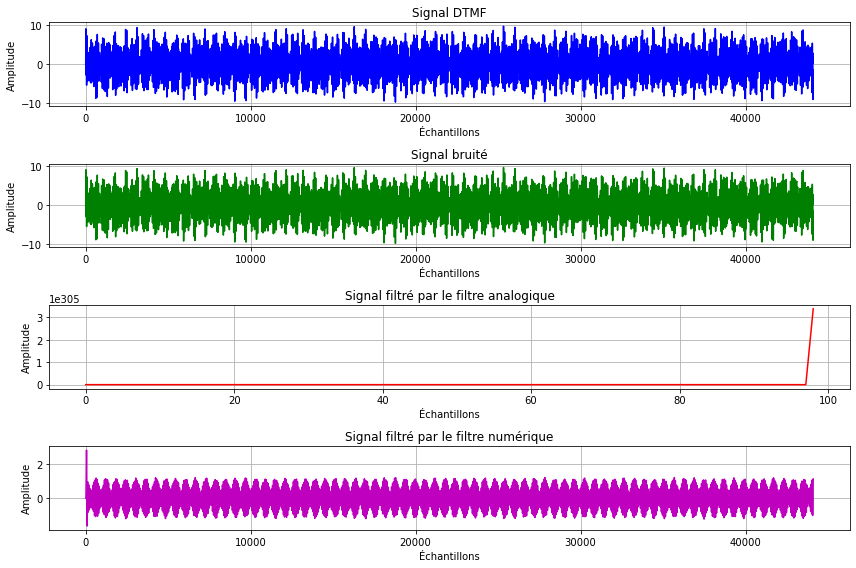

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Fonction pour générer un signal DTMF à partir d'une séquence de touches
def generate_dtmf_signal(numbers, duration, sampling_freq):
    dtmf_freqs = {'1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
                  '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
                  '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
                  '*': (941, 1209), '0': (941, 1336), '#': (941, 1477)}
    t = np.linspace(0, duration, int(duration * sampling_freq), endpoint=False)
    dtmf_signal = np.zeros_like(t)
    for num in numbers:
        f1, f2 = dtmf_freqs[num]
        dtmf_signal += np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    return dtmf_signal

# Paramètres du signal DTMF
numbers = '12345'
duration = 1  # Durée en secondes
sampling_freq = 44100  # Fréquence d'échantillonnage en Hz

# Génération du signal DTMF
dtmf_signal = generate_dtmf_signal(numbers, duration, sampling_freq)

# Ajout de bruit au signal DTMF
noise_level = 0.1
noisy_signal = dtmf_signal + noise_level * np.random.randn(len(dtmf_signal))

# Création d'un filtre passe-bas analogique
analog_order = 4
analog_cutoff_frequency = 1000  # Fréquence de coupure en Hz
b_analog, a_analog = signal.butter(analog_order, analog_cutoff_frequency, 'low', analog=True)

# Application du filtre passe-bas analogique
filtered_signal_analog = signal.lfilter(b_analog, a_analog, noisy_signal)

# Création d'un filtre passe-bas numérique
normalized_cutoff_frequency = analog_cutoff_frequency / sampling_freq  # Fréquence de coupure normalisée
b_digital, a_digital = signal.butter(analog_order, normalized_cutoff_frequency, 'low', analog=False)

# Application du filtre passe-bas numérique
filtered_signal_digital = signal.lfilter(b_digital, a_digital, noisy_signal)

# Affichage temporel des signaux séparément
plt.figure(figsize=(12, 8))

# Signal DTMF
plt.subplot(4, 1, 1)
plt.plot(dtmf_signal, 'b')
plt.title('Signal DTMF')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)

# Signal bruité
plt.subplot(4, 1, 2)
plt.plot(noisy_signal, 'g')
plt.title('Signal bruité')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)

# Signal filtré par le filtre analogique
plt.subplot(4, 1, 3)
plt.plot(filtered_signal_analog, 'r')
plt.title('Signal filtré par le filtre analogique')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)

# Signal filtré par le filtre numérique
plt.subplot(4, 1, 4)
plt.plot(filtered_signal_digital, 'm')
plt.title('Signal filtré par le filtre numérique')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
